# AMAZON DATA SCEINCE BOOKS ANALYSIS

While Learning this course i got really interested in data science so much so that i wanted to read a book. Buying a book from Amazon on a particular topic is a hassle as it involves conflicting choices. So i decided to create a project to analyse everything 

## Downloading the Dataset

Using the opendatasets library we will download a kaggle dataset and store it locally.

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books?select=final_book_dataset_kaggle2.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./amazon-data-science-books" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './amazon-datascience-dataset'

In [5]:
import os
try : 
  os.mkdir(data_dir)
except :
  FileExistsError : print('The file already exists')


os.listdir(data_dir)

The file already exists


[]

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

Data Preparation and Cleaning is a crucial task, as the data may vary, and because of those null values, the outcomes may also vary, giving us an altered assumptions about the data



In [10]:
bookdata = pd.read_csv("/content/amazon-data-science-books/final_book_dataset_kaggle2.csv")

# **Getting to know about the data set**

In [11]:
bookdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

# **Sample of the dataframe**

In [12]:
bookdata.sample(20)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
108,Everyday Adventures with Unruly Data,[ Melanie Feinberg],35.00,35,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 x 0.85 x 9 inches,14.4 ounces,English,"The MIT Press (October 11, 2022)",978-0262544405,/Everyday-Adventures-Unruly-Melanie-Feinberg/d...,https://www.amazon.com/Everyday-Adventures-Unr...
682,Building Data Science Applications with FastAP...,[ François Voron],31.49,31.49,426,4.4,29,69%,6%,19%,6%,NaN,NaN,NaN,English,"Packt Publishing; 1st edition (October 8, 2021)",NaN,/Building-Data-Science-Applications-FastAPI-eb...,https://www.amazon.com/Building-Data-Science-A...
553,Modeling and Simulation in Python,[ Allen B. Downey],39.99,39.99,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04 x 0.04 x 0.04 inches,13 ounces,English,"No Starch Press (May 30, 2023)",978-1718502161,/Modeling-Simulation-Python-Allen-Downey/dp/17...,https://www.amazon.com/Modeling-Simulation-Pyt...
804,Essential Calculus Skills Practice Workbook wi...,[ Chris McMullen],9.99,9.99,151,4.6,"1,537",74%,16%,7%,1%,2%,8 x 0.35 x 10 inches,11 ounces,English,"Zishka Publishing (August 16, 2018)",978-1941691243,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
48,An Introduction to Statistics and Data Analysi...,"[ Lisa Daniels, and , Nicholas W. Minot]",75.24,24.50 - 75.24,392,4.6,32,69%,22%,9%,NaN,NaN,7.38 x 0.89 x 9.13 inches,1.52 pounds,English,"SAGE Publications, Inc; 1st edition (January 2...",978-1506371832,/Introduction-Statistics-Analysis-Using-Stata%...,https://www.amazon.com/Introduction-Statistics...
574,Real-World Python: A Hacker's Guide to Solving...,[ Lee Vaughan],34.95,21.75 - 34.95,360,4.7,96,79%,15%,2%,2%,1%,7 x 0.93 x 9.25 inches,1.5 pounds,English,"No Starch Press (November 5, 2020)",,/Real-World-Python-Hackers-Solving-Problems/dp...,https://www.amazon.com/Real-World-Python-Hacke...
31,Coding Games in Python (Computer Coding for Kids),[ DK],13.99,13.99,224,4.5,274,70%,17%,6%,4%,4%,7.75 x 0.63 x 9.19 inches,1.54 pounds,English,"DK Children; Illustrated edition (July 3, 2018)",$13.99,/Coding-Games-Python-DK/dp/1465473610/ref=sr_1...,https://www.amazon.com/Coding-Games-Python-DK/...
179,The Definitive Guide to DAX: Business Intellig...,NaN,43.99,42.11 - 43.99,768,4.7,"1,155",83%,12%,3%,1%,1%,7.38 x 1.73 x 9.13 inches,3 pounds,English,"Microsoft Press; 2nd edition (July 2, 2019)",978-1509306978,/Definitive-Guide-DAX-intelligence-Microsoft/d...,https://www.amazon.com/Definitive-Guide-DAX-in...
324,Hypothesis Testing: An Intuitive Guide for Mak...,[ Jim Frost],23.74,23.74,381,4.5,112,77%,13%,3%,2%,5%,6 x 0.86 x 9 inches,1.12 pounds,English,"Statistics By Jim Publishing (September 14, 2020)",978-1735431154,/Hypothesis-Testing-Intuitive-Making-Decisions...,https://www.amazon.com/Hypothesis-Testing-Intu...
462,Python Programming for Beginners: An Introduct...,[ Jason Cannon],NaN,NaN,164,4.5,"1,001",72%,15%,8%,3%,2%,NaN,NaN,English,NaN,NaN,/Python-Programming-Beginners-Introduction-Com...,https://www.amazon.com/Python-Programming-Begi...


In [13]:
bookdata2  = bookdata.copy()

In [14]:
bookdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [15]:
bookdata2.describe()

,price,avg_reviews
count,722.000000,702.000000
mean,46.491537,4.472080
std,63.292394,0.409608
min,0.990000,1.000000
25%,23.725000,4.325000
50%,39.490000,4.500000
75%,51.990000,4.700000
max,1318.740000,5.000000


**changing values to numeric**

In [16]:
bookdata2['pages'] = pd.to_numeric(bookdata2['pages'], errors = 'coerce')
bookdata2['price (including used books)'] = pd.to_numeric(bookdata2['price (including used books)'], errors = 'coerce')
bookdata2['n_reviews'] = pd.to_numeric(bookdata2['n_reviews'], errors = 'coerce')
bookdata2['weight'] = bookdata2['n_reviews'].map(str)


In [17]:
bookdata2.drop(bookdata2[bookdata2['price (including used books)'] < 10].index, inplace = True)

# **DATA PREPROCESSING AND CLEANING**

If we check the row 16 in this dataset, the book is 
"MONTY PYTHON AND THE HOLY GRAIL"

which is not a book that teaches python but it's a comic book authored by Monty Python 
hence we need to drop such rows

In [18]:
bookdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 1 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         787 non-null    object 
 1   author                        628 non-null    object 
 2   price                         679 non-null    float64
 3   price (including used books)  418 non-null    float64
 4   pages                         701 non-null    float64
 5   avg_reviews                   665 non-null    float64
 6   n_reviews                     627 non-null    float64
 7   star5                         665 non-null    object 
 8   star4                         604 non-null    object 
 9   star3                         523 non-null    object 
 10  star2                         425 non-null    object 
 11  star1                         307 non-null    object 
 12  dimensions                    614 non-null    object 
 13  weigh

**To see how many percentage of the data is actually null column wise**

In [19]:
null_var = bookdata.isnull().sum()/bookdata.shape[0] * 100
null_var

title                            0.000000
author                          20.843373
price                           13.012048
price (including used books)    13.012048
pages                           10.240964
avg_reviews                     15.421687
n_reviews                       15.421687
star5                           15.421687
star4                           23.493976
star3                           33.253012
star2                           45.662651
star1                           60.481928
dimensions                      22.409639
weight                          21.566265
language                         8.554217
publisher                       13.975904
ISBN_13                         19.879518
link                             0.000000
complete_link                    0.000000
dtype: float64

**we can see that these types of books have mostly all attributes set to NaN**

***The most efficient startegy and the ideation to fix and handle all the missing values is to make a heatmap of it and then curating it in such a way that you see a clear heatmap with no whitelines of NaN values***

<Axes: >

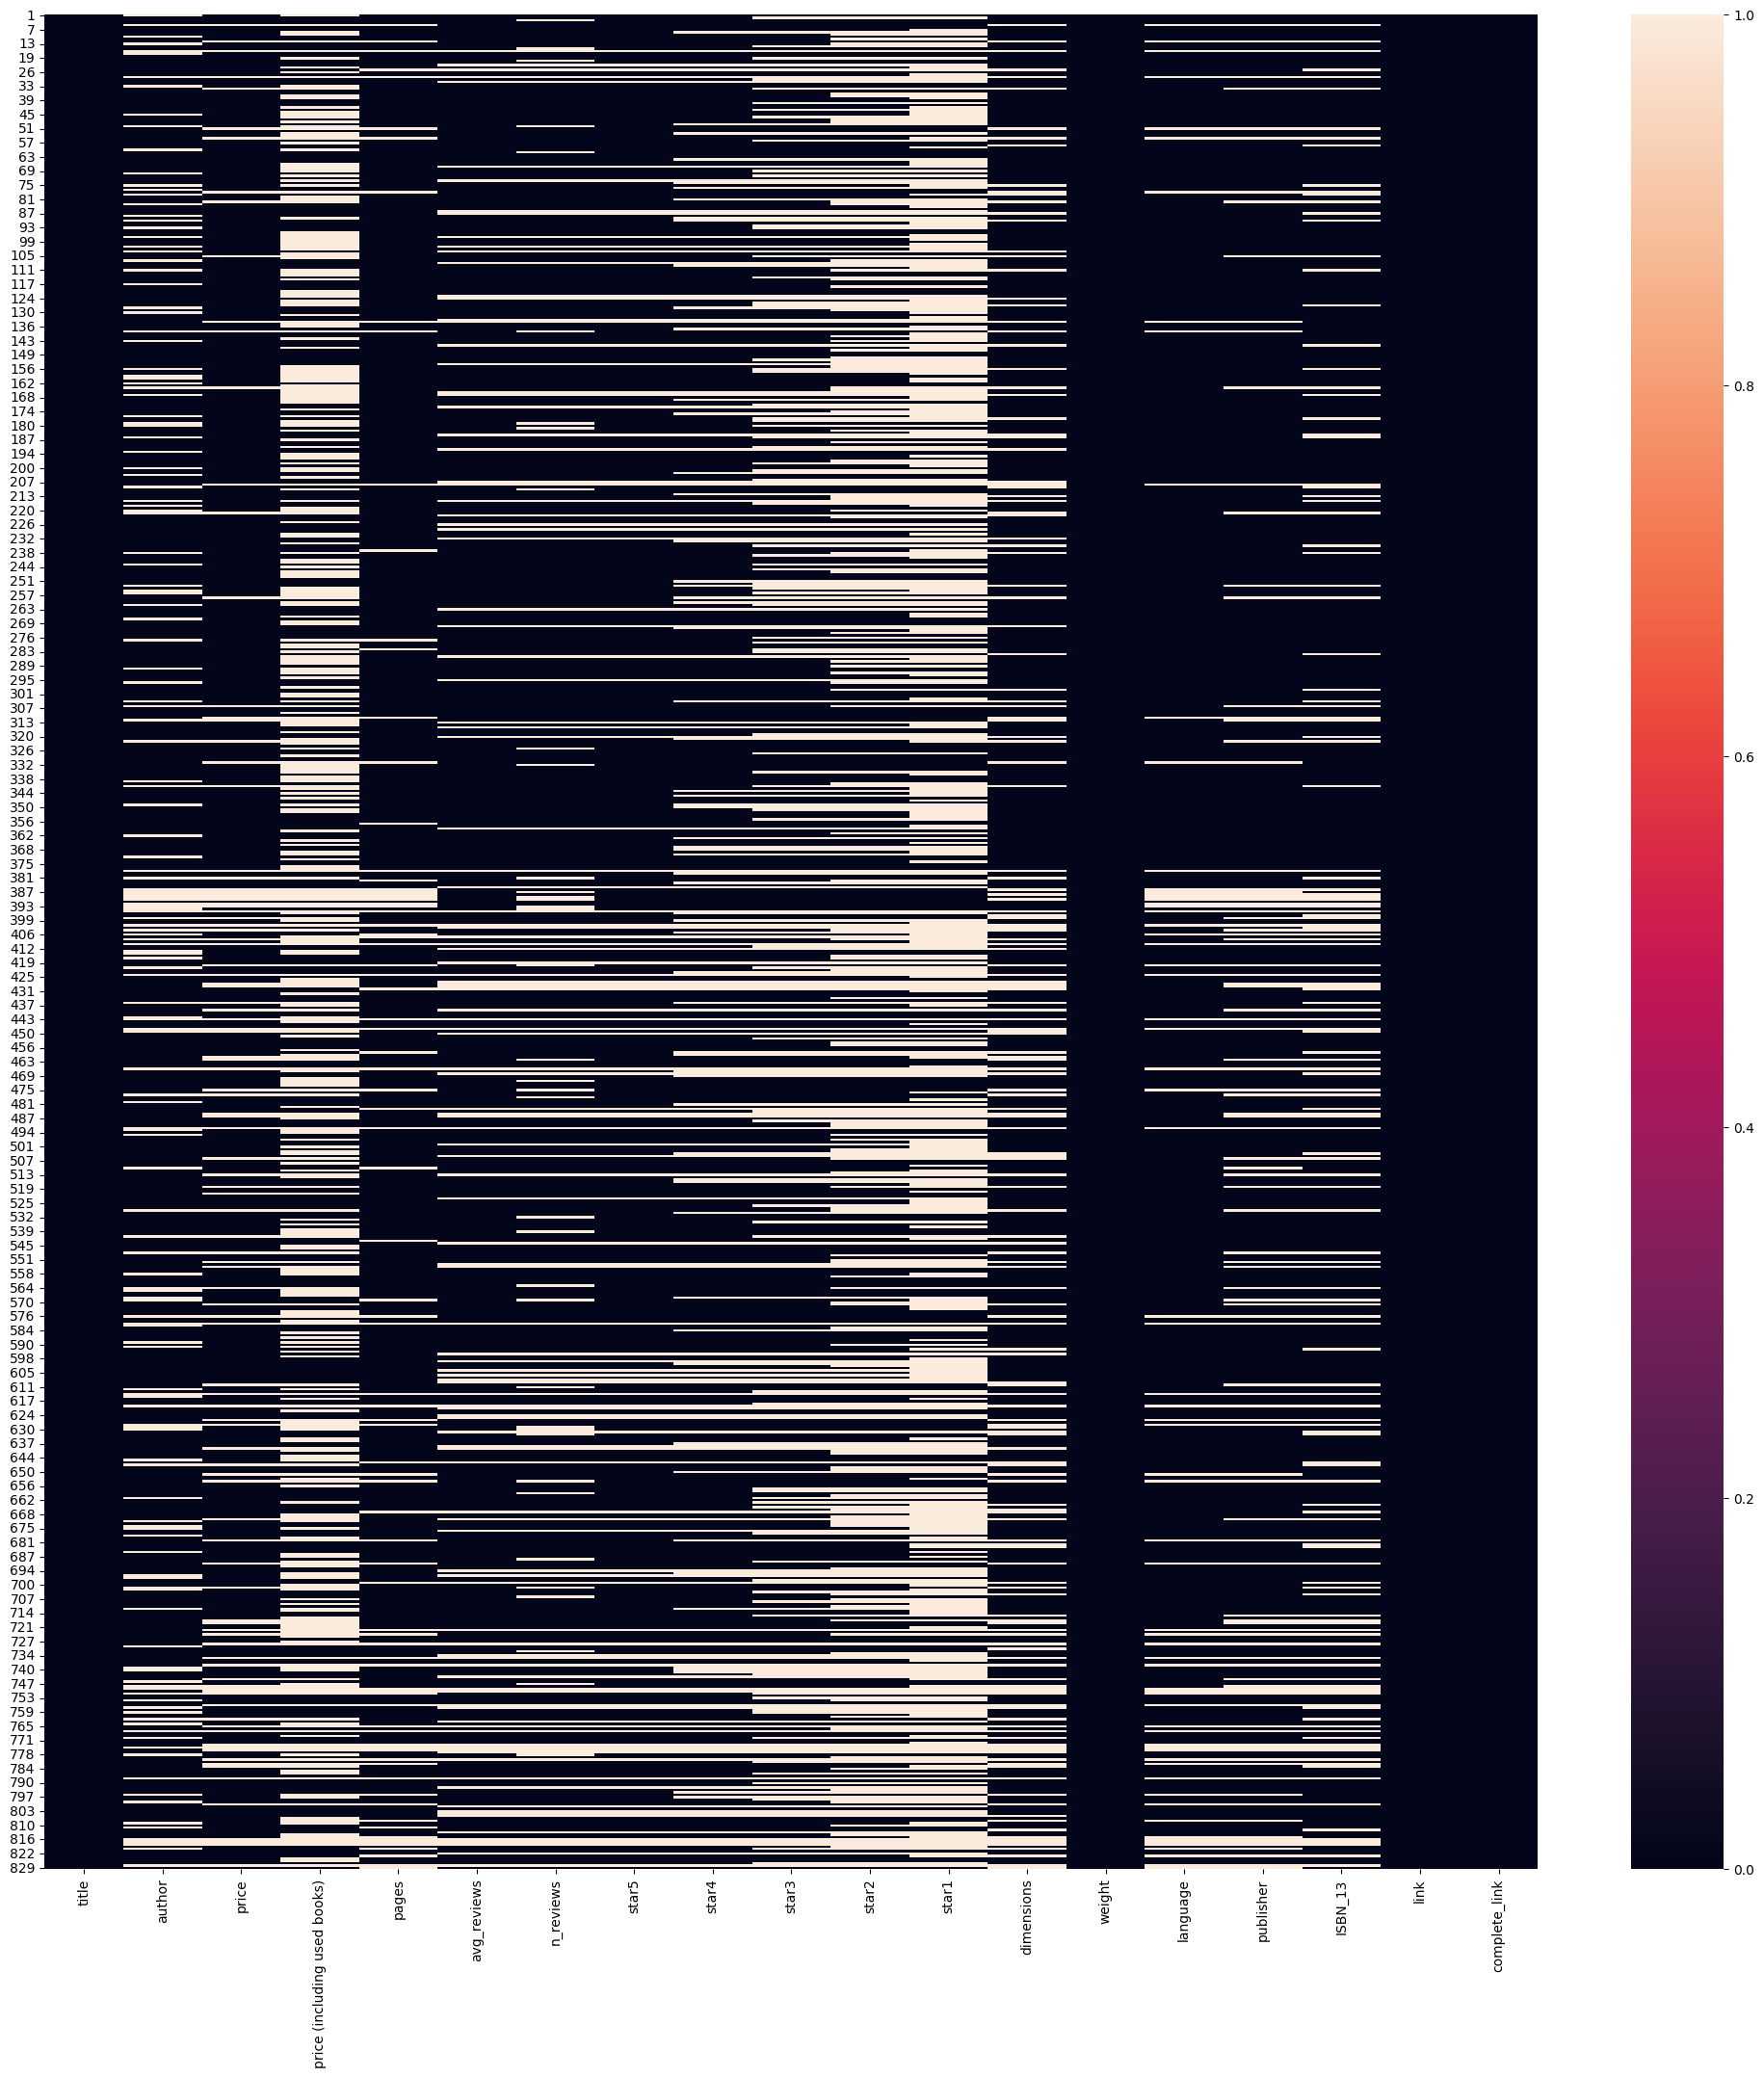

In [20]:
plt.figure(figsize = (25,25))
sns.heatmap(bookdata2.isnull())

**The most Missing values are in the coloums which are star1, star2....**

So it would be best to delete it

In [21]:
bookdata2.drop(['star1', 'star2', 'star3', 'star4', 'dimensions'], inplace = True, axis = 1)

<Axes: >

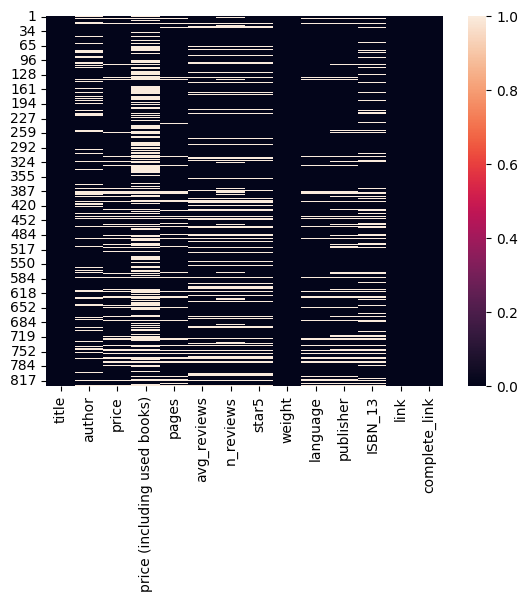

In [22]:
sns.heatmap(bookdata2.isnull())

In [23]:
bookdata2.isnull().sum()/bookdata2.shape[0] * 100

title                            0.000000
author                          20.203304
price                           13.722999
price (including used books)    46.886912
pages                           10.927573
avg_reviews                     15.501906
n_reviews                       20.330368
star5                           15.501906
weight                           0.000000
language                         8.767471
publisher                       13.595934
ISBN_13                         18.678526
link                             0.000000
complete_link                    0.000000
dtype: float64

In [24]:
drop_column = null_var[null_var > 20]
drop_column.index

Index(['author', 'star4', 'star3', 'star2', 'star1', 'dimensions', 'weight'], dtype='object')

# **DROPPING ALL THE NULL VALUES**

---



In [25]:
bookdata3 = bookdata2.dropna()

In [26]:
bookdata3.shape

(266, 14)

<Axes: >

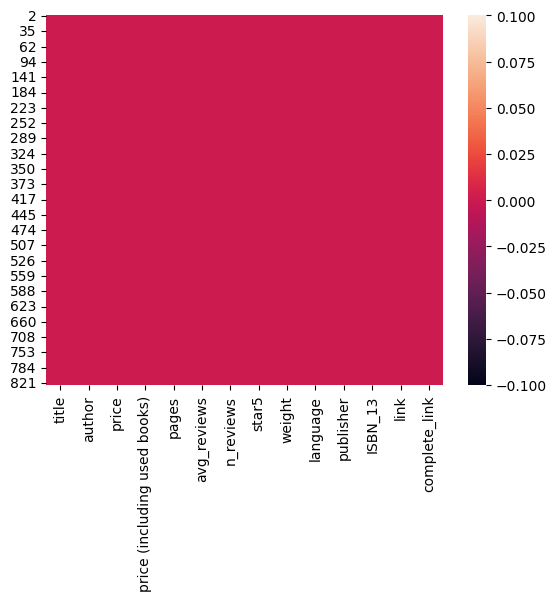

In [27]:
sns.heatmap(bookdata3.isnull())

In [50]:
import jovian

In [51]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

***Main aim for this section is to understand and get the gist of the data, also preprocessing it and making it clean, checking the observable variation generated after handling missing values ***



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Compute the mean, sum, range and other interesting statistics for numeric columns**

In [31]:
bookdata3.describe()

,price,price (including used books),pages,avg_reviews,n_reviews
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,37.053985,37.053985,365.000000,4.475940,90.281955
std,22.581618,22.581618,177.471103,0.474346,143.251275
min,10.990000,10.990000,31.000000,1.000000,1.000000
25%,22.990000,22.990000,240.000000,4.300000,10.000000
50%,36.990000,36.990000,352.000000,4.550000,33.000000
75%,45.365000,45.365000,455.500000,4.700000,100.750000
max,287.140000,287.140000,1168.000000,5.000000,988.000000


<ipython-input-32-fa58e84388fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bookdata2.describe())


<Axes: ylabel='Density'>

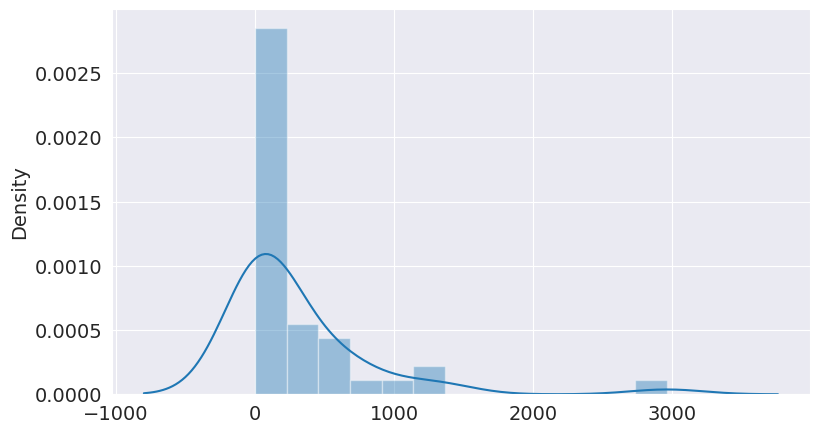

In [32]:
sns.distplot(bookdata2.describe())

<ipython-input-33-a3a9d3382933>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bookdata3.describe())


<Axes: ylabel='Density'>

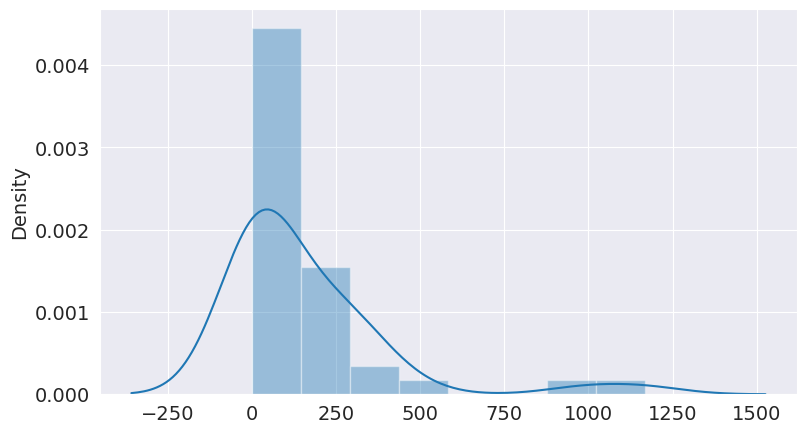

In [33]:
sns.distplot(bookdata3.describe())

***As we can see that although the proportions have changed the curves of the graph remains to be same, hence the data is distributed in an efficient manner, and not abruptly.***

***Explore distributions of numeric columns using histograms etc.***

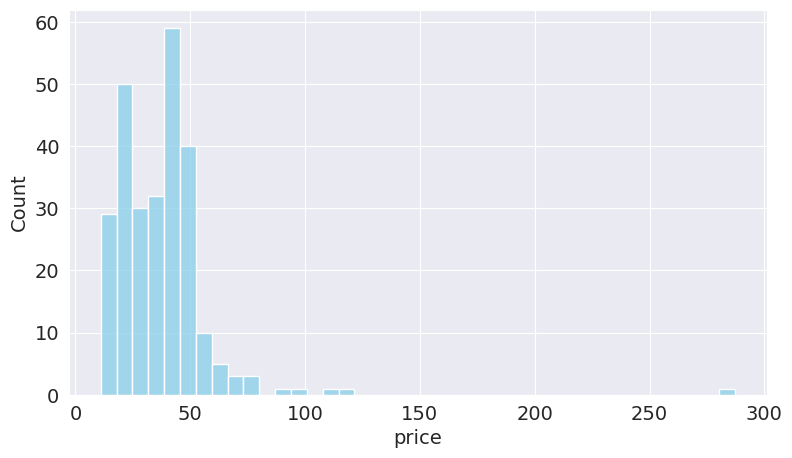

In [34]:
sns.histplot(bookdata3.price, color = 'skyblue');

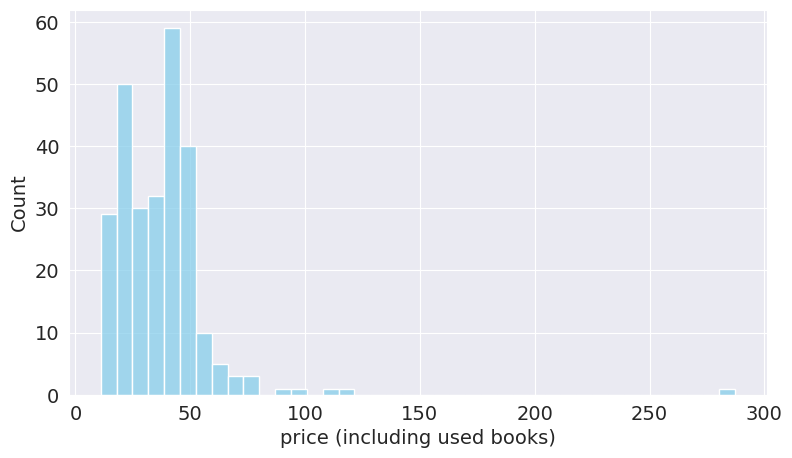

In [35]:
sns.histplot(bookdata3['price (including used books)'], color = 'skyblue');

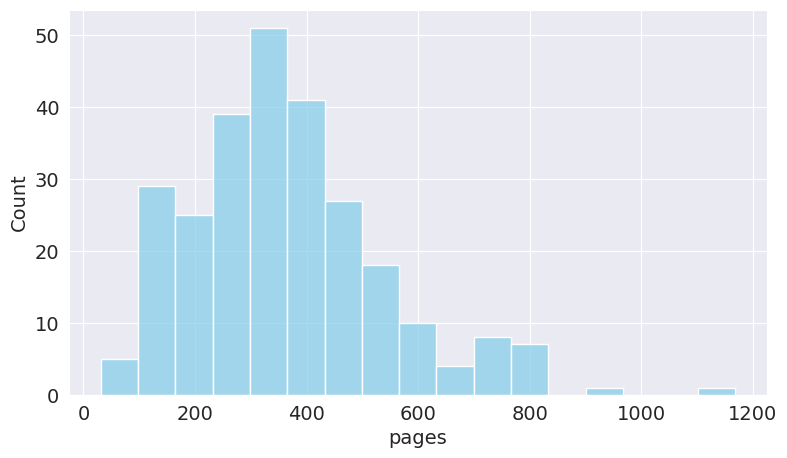

In [36]:
sns.histplot(bookdata3['pages'], color = 'skyblue');

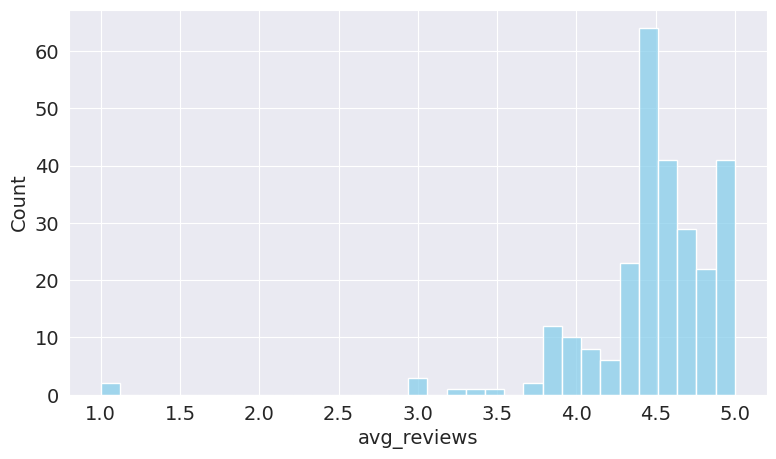

In [37]:
sns.histplot(bookdata3['avg_reviews'], color = 'skyblue');

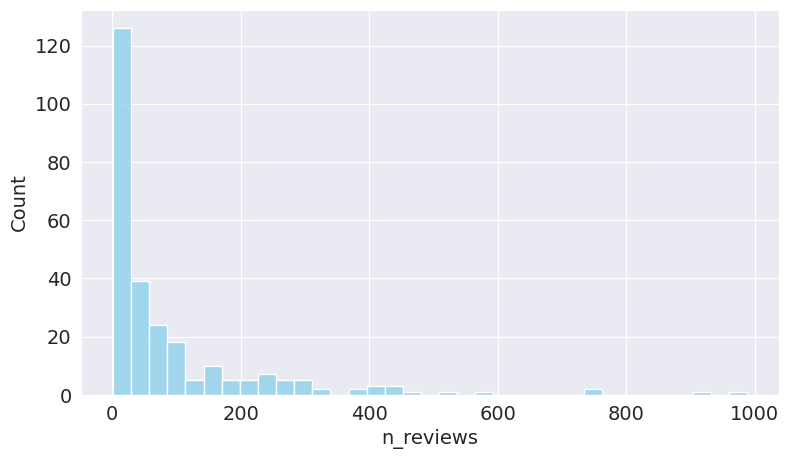

In [38]:
sns.histplot(bookdata3['n_reviews'], color = 'skyblue');

***Explore relationship between columns using scatter plots, bar charts etc.***

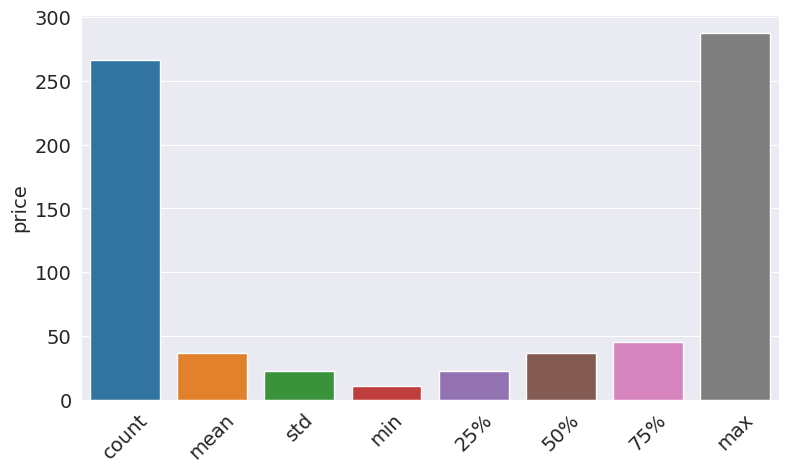

In [39]:
sns.barplot(y = bookdata3.describe()['price'], x = bookdata3.describe()['price'].index)
plt.xticks(rotation = 45);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [40]:
import jovian

In [41]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [42]:
bookdata3

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,weight,language,publisher,ISBN_13,link,complete_link
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274.0,4.7,10.0,87%,10.0,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368.0,3.9,12.0,52%,12.0,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360.0,4.6,72.0,75%,72.0,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90.00,408.0,4.7,205.0,84%,205.0,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
11,SQL for Data Analytics: Perform efficient and ...,[ Chad Knowles],15.97,15.97,106.0,4.9,201.0,91%,201.0,English,"Independently published (September 21, 2022)",979-8354008353,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,The Digital Mindset: What It Really Takes to T...,"[ Paul Leonardi, and , Tsedal Neeley]",19.69,19.69,272.0,4.4,73.0,68%,73.0,English,"Harvard Business Review Press (May 10, 2022)",978-1647820107,/Digital-Mindset-Really-Thrive-Algorithms/dp/1...,https://www.amazon.com/Digital-Mindset-Really-...
810,Tableau Prep Cookbook: Use Tableau Prep to cle...,[ Hendrik Kleine],41.99,41.99,288.0,4.1,17.0,63%,17.0,English,"Packt Publishing (March 19, 2021)",978-1800563766,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Decolonizing Data: Unsettling Conversations ab...,[ Jacqueline M. Quinless],24.95,24.95,172.0,4.6,9.0,75%,9.0,English,"University of Toronto Press (February 15, 2022)",25,/Decolonizing-Data-Unsettling-Conversations-Re...,https://www.amazon.com/Decolonizing-Data-Unset...
821,Machine Learning with PyTorch and Scikit-Learn...,"[ Sebastian Raschka, Yuxi (Hayden) Liu, et al.]",39.02,39.02,774.0,4.6,164.0,80%,164.0,English,"Packt Publishing (February 25, 2022)",978-1801819312,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...


## Asking and Answering Questions

Answering some aggregation and logical questions about the dataset



#### Q1: Calculate the Rate of the shipment of a book within 200km radius, according to the DTDC transportation charges

**The Data we are provided with contains the weight as an object, which looks somewhat like "32 ounce" like this, to convert this into numerical data(float) we are making this function to transform it.**

In [43]:
weight_series = bookdata3['weight']
for index, value in weight_series[weight_series.notnull()].iteritems():
  if "ounces" in weight_series[index]:
    value = weight_series[index].replace('ounces', "").strip()
    value = float(value)
    weight_series[index] = value
  elif "pounds" in weight_series[index]:
    value = weight_series[index].replace('pounds', "").strip()
    value = float(value)
    value = value *16
    weight_series[index] = value

<ipython-input-43-dac2da1b20de>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in weight_series[weight_series.notnull()].iteritems():


**Assigning all the values of the float series that we made into the original column of the dataframe**

In [44]:
bookdata3['weight'] = weight_series

<ipython-input-44-7cc37ac86631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookdata3['weight'] = weight_series


**Final Conversion into the Float64**

In [45]:
bookdata3['weight'] = pd.to_numeric(bookdata3['weight'], errors = 'ignore')

<ipython-input-45-0daf322801d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookdata3['weight'] = pd.to_numeric(bookdata3['weight'], errors = 'ignore')


**Assigning the rate chart as a new column to the dataframe which shows the prices of the shipment categorically.**

In [46]:
#fixing rates for the dtdc courier services in the range of 200 kms
#they take (35 rs for less than 2 ounce), (70 for 3 to 8 ounce). (100 for 9 to 18 ounce), (500 for anything above that)
rate_series = bookdata3['weight']
bookdata3['rate_ship (Rs)'] = ''
for index, value in rate_series[rate_series.notnull()].iteritems():
    if value < 2.0:
      bookdata3['rate_ship (Rs)'][index] = 35
    elif value >= 2.0 and value < 8.0:
      bookdata3['rate_ship (Rs)'][index] = 70
    elif value >= 8.0 and value < 18.0:
      bookdata3['rate_ship (Rs)'][index] = 100
    else:
      bookdata3['rate_ship (Rs)'][index] = 500
      

<ipython-input-46-366d18ef7edd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookdata3['rate_ship (Rs)'] = ''
<ipython-input-46-366d18ef7edd>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in rate_series[rate_series.notnull()].iteritems():
<ipython-input-46-366d18ef7edd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookdata3['rate_ship (Rs)'][index] = 100
<ipython-input-46-366d18ef7edd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Displaying the OUTCOME

In [47]:
bookdata3

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,weight,language,publisher,ISBN_13,link,complete_link,rate_ship (Rs)
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274.0,4.7,10.0,87%,10.0,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,100
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368.0,3.9,12.0,52%,12.0,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,100
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360.0,4.6,72.0,75%,72.0,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...,500
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90.00,408.0,4.7,205.0,84%,205.0,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...,500
11,SQL for Data Analytics: Perform efficient and ...,[ Chad Knowles],15.97,15.97,106.0,4.9,201.0,91%,201.0,English,"Independently published (September 21, 2022)",979-8354008353,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,The Digital Mindset: What It Really Takes to T...,"[ Paul Leonardi, and , Tsedal Neeley]",19.69,19.69,272.0,4.4,73.0,68%,73.0,English,"Harvard Business Review Press (May 10, 2022)",978-1647820107,/Digital-Mindset-Really-Thrive-Algorithms/dp/1...,https://www.amazon.com/Digital-Mindset-Really-...,500
810,Tableau Prep Cookbook: Use Tableau Prep to cle...,[ Hendrik Kleine],41.99,41.99,288.0,4.1,17.0,63%,17.0,English,"Packt Publishing (March 19, 2021)",978-1800563766,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...,100
819,Decolonizing Data: Unsettling Conversations ab...,[ Jacqueline M. Quinless],24.95,24.95,172.0,4.6,9.0,75%,9.0,English,"University of Toronto Press (February 15, 2022)",25,/Decolonizing-Data-Unsettling-Conversations-Re...,https://www.amazon.com/Decolonizing-Data-Unset...,100
821,Machine Learning with PyTorch and Scikit-Learn...,"[ Sebastian Raschka, Yuxi (Hayden) Liu, et al.]",39.02,39.02,774.0,4.6,164.0,80%,164.0,English,"Packt Publishing (February 25, 2022)",978-1801819312,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...,500


#### Q2: List the top 10 authors who has the highest rated books

In [ ]:
top_authors_series = bookdata3.nlargest(10, 'n_reviews')

In [ ]:
top_authors_series

In [ ]:
sns.barplot(y = top_authors_series['author'], x = top_authors_series['n_reviews'])
plt.xticks(rotation = 0);

#### Q3: IS THE PRICE WORTH THE BOOK?  (***price vs rating***)

In [ ]:
sns.scatterplot(x = bookdata3['price'], y = bookdata3['avg_reviews'], hue = bookdata3['avg_reviews']);

#### Q4: which is the highest rated book

In [ ]:
highest_avg_reviews = bookdata3.nlargest(10, 'avg_reviews')

In [ ]:
highest_n_reviews = bookdata3.nlargest(10, 'n_reviews')

In [ ]:
highest_merge = pd.merge(highest_avg_reviews, highest_n_reviews, right_index = True,
               left_index = True)

In [ ]:
highest_merge

In [ ]:
sns.barplot(y = highest_merge['title_x'], x = highest_merge['n_reviews_x'])
plt.xticks(rotation = 75);

#### Q5: lowest rated book 

In [ ]:
lowest_avg_reviews = bookdata3.nsmallest(10, 'avg_reviews')

In [ ]:
lowest_n_reviews = bookdata3.nsmallest(10, 'n_reviews')

In [ ]:
merged_reviews = pd.merge(lowest_avg_reviews, lowest_n_reviews)

In [ ]:
merged_reviews

In [ ]:
sns.barplot(y = merged_reviews['title'], x = merged_reviews['n_reviews'])
plt.xticks(rotation = 75);

Let us save and upload our work to Jovian before continuing.

In [48]:
import jovian

In [49]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

***From my analysis, I was able to see which books were more popular based on the number of ratings they received, the average rating for each book, and even the relationship between book prices and ratings. Overall, my analysis has provided valuable insights into the Amazon Data Science book data set, allowing us to understand its contents more deeply.***

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

References:

Amazon Data Science Book dataset (source: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)
Pandas documentation (source: https://pandas.pydata.org/pandas-docs/stable/)
NumPy documentation (source: https://numpy.org/doc/)
Seaborn documentation (source: https://seaborn.pydata.org/)
Matplotlib documentation (source: https://matplotlib.org/)

Future Work:

Apply advanced machine learning algorithms such as neural networks and deep learning to the Amazon Data Science Book dataset to build predictive models for book sales and ratings.

Incorporate additional external datasets, such as demographic data or book industry trends, to gain deeper insights into the factors that influence book sales and popularity.

Use natural language processing techniques to analyze book reviews and extract insights into readers' opinions on specific books or authors.
Explore the impact of advertising and marketing campaigns on book sales and ratings, and identify the most effective strategies for promoting books in the data set.

Investigate the impact of external events such as awards, media coverage, and author appearances on book sales and ratings in the data set.

In [1]:
import jovian

ModuleNotFoundError: ignored

In [ ]:
jovian.commit()